# <b><p style="background-color: #ff6200; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Task 31-> Dimensionality Reduction Techniques</p>

## Dimensionality Reduction

**Dimensionality Reduction** is a technique used in data analysis and machine learning to reduce the number of features (or dimensions) in a dataset while preserving its essential characteristics. This process involves transforming a dataset with a large number of features into a dataset with fewer features, thereby simplifying the data without significantly losing its informational content.

In high-dimensional datasets, where the number of features can be large, dimensionality reduction helps in various ways. First, it can improve the performance of machine learning algorithms by reducing the computational cost and mitigating issues related to the "curse of dimensionality," where the data becomes sparse and harder to analyze as the number of dimensions increases. High-dimensional data can also lead to overfitting, where models perform well on training data but poorly on unseen data due to capturing noise rather than the underlying pattern. By reducing dimensions, dimensionality reduction can help create more generalized models.

Additionally, dimensionality reduction can enhance the visualization of complex data. When dealing with datasets that have many features, visualizing the data directly can be challenging. By reducing the number of dimensions, it becomes easier to plot and interpret the data, allowing for more intuitive understanding and exploration.

The process of dimensionality reduction typically involves projecting the original high-dimensional data into a lower-dimensional space. This transformation is done in a way that retains the most significant aspects of the data's structure and relationships. The reduction can be performed using various techniques that balance the trade-off between reducing dimensionality and retaining the data’s intrinsic properties.

Overall, dimensionality reduction is a crucial step in the data preprocessing pipeline, helping to simplify complex datasets, improve model performance, and make data analysis more manageable.

## <span style='color:#ff6200'> Importing Libraries</span>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

## <span style='color:#ff6200'> Generating Synthetic Dataset</span>

In [2]:
X, y = make_classification(n_samples=1000, n_features=50, n_informative=10, n_redundant=10, random_state=42)

df_synthetic = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
df_synthetic['target'] = y

print("Data Shape:", df_synthetic.shape)

df_synthetic.head()

Data Shape: (1000, 51)


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,target
0,0.966147,-0.727454,2.131718,-1.957401,0.431284,1.033079,0.528635,-1.031989,-0.864263,-0.646528,...,-0.596325,1.808365,-1.403616,0.212726,-4.439763,-0.521255,-2.336070,-0.186831,0.949263,0
1,1.655911,-0.191382,9.002949,5.592632,-0.029966,3.792208,1.034195,-0.928134,-0.409389,-0.755136,...,1.309848,0.220600,-0.300315,0.821870,-2.797112,1.290463,0.947058,-6.874797,0.585150,1
2,-2.227800,-0.522130,1.256295,-0.679333,-0.322676,2.020422,0.315310,1.171768,0.416687,-0.538526,...,-0.828206,-0.667150,0.274931,-1.209422,-2.366190,2.071171,1.203959,-1.617080,0.204445,1
3,-1.033323,-1.768925,2.176333,1.588119,1.457515,0.856352,-0.298600,-2.707513,-1.929498,2.195285,...,0.469454,-3.018707,2.535385,-0.228366,2.200704,-2.266407,-0.147442,-0.142714,0.935455,1
4,2.128831,0.474802,11.278766,4.651767,0.593075,1.832385,1.053877,-13.386385,-2.616338,0.839322,...,1.591318,-3.217724,-0.458850,-0.060055,0.519946,-0.157676,-0.090833,-5.092081,0.393372,1


In [3]:
X = df_synthetic.drop(columns = ['target'])
y = df_synthetic['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## <span style='color:#ff6200'> Applying Simple Moidel</span>

In [4]:
clf = LogisticRegression(max_iter=10000, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred)
report_before = classification_report(y_test, y_pred)

print("Classification Report:\n", report_before)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       154
           1       0.78      0.88      0.82       146

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



# <b><span style='color:#ff6200'> Principal Component Analysis (PCA)</span>

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform a dataset with potentially many correlated features into a smaller set of uncorrelated components, known as principal components. The goal of PCA is to simplify the data while retaining as much variance as possible. This is achieved by projecting the original data onto a new set of axes, where each axis (principal component) captures the maximum variance from the data. The first principal component captures the largest variance, the second captures the next largest variance orthogonal to the first, and so on. PCA is widely used in exploratory data analysis and preprocessing for machine learning to reduce the complexity of the data and mitigate multicollinearity issues.

## <span style='color:#fcc36d'> Optimal K </span>

To determine the optimal number of principal components 𝑘, one typically examines the cumulative explained variance ratio, which indicates how much of the total variance is explained by the first 𝑘 components. This can be visualized by plotting the cumulative explained variance against the number of components. The "elbow" of the curve or a point where the explained variance reaches a desired threshold (e.g., 95%) is often chosen as the optimal k. This threshold represents a trade-off between reducing dimensionality and retaining sufficient information from the original data. By selecting an appropriate 𝑘, you ensure that the data is simplified without losing critical variability, which helps in effective analysis and modeling.

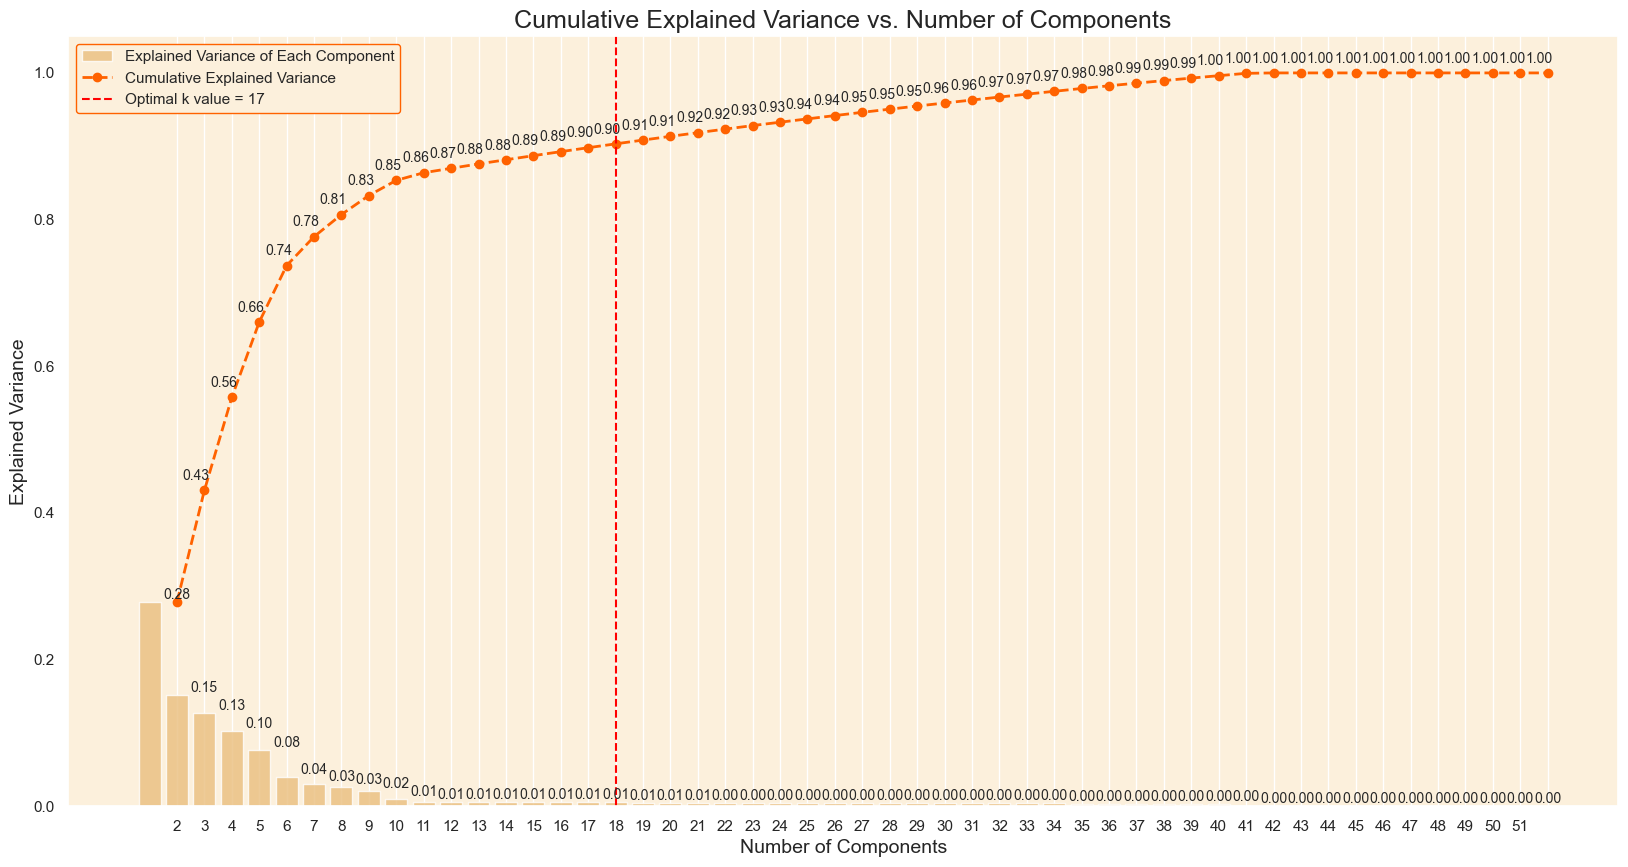

In [5]:
pca = PCA().fit(df_synthetic)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

min_acceptable_variance = 0.90

optimal_k = np.argmax(cumulative_explained_variance >= min_acceptable_variance) + 1 

sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')
plt.figure(figsize=(20, 10))

barplot = sns.barplot(x=list(range(1, len(explained_variance_ratio) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)
lineplot, = plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)
optimal_k_line = plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Explained Variance vs. Number of Components', fontsize=18)

plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc='best',
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i + 1, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + 1 + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [6]:
pca = PCA(n_components=17)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf.fit(X_train_pca, y_train)
y_pred_pca = clf.predict(X_test_pca)
accuracy_after = accuracy_score(y_test, y_pred_pca)
report_after = classification_report(y_test, y_pred_pca)

print("\nClassification Report After PCA:\n", report_after)


Classification Report After PCA:
               precision    recall  f1-score   support

           0       0.90      0.78      0.83       154
           1       0.80      0.90      0.85       146

    accuracy                           0.84       300
   macro avg       0.85      0.84      0.84       300
weighted avg       0.85      0.84      0.84       300



# <b><span style='color:#ff6200'>  Linear Discriminant Analysis (LDA)</span>

Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique used to identify a linear combination of features that best separates two or more classes in a dataset. Unlike Principal Component Analysis (PCA), which is an unsupervised method focusing on maximizing variance, LDA aims to maximize the distance between the means of different classes while minimizing the variance within each class. This makes LDA particularly useful for classification tasks, where the goal is to find the most discriminative features that enhance class separation.

LDA works by projecting the data onto a lower-dimensional space while preserving class separability. It achieves this by solving an optimization problem that seeks to maximize the ratio of between-class variance to within-class variance. The resulting linear discriminants are then used as new features for classification. This technique is widely used in pattern recognition and machine learning to improve classification performance and reduce dimensionality.

In [10]:
X, y = make_classification(n_samples=1000, n_features=50, n_classes=4, n_informative=10, n_redundant=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

Explained Variance Ratio: [0.55346988 0.24096534]
Class-wise Means: [[ 4.62934991e-02  1.51358628e-02  4.65537104e-02 -1.80292636e+00
   3.12731790e-02  6.45717462e-02 -7.97953709e-02  7.16904181e-02
   2.64464499e-02 -8.37520906e-01 -1.12284396e+00  3.43463648e+00
  -1.02792072e+00 -2.43936452e-02 -9.21634162e-02  1.44979874e-02
   2.74060563e+00 -1.71370608e-02  9.18233476e-03 -1.91492719e-02
  -1.23354293e-01 -9.49169676e-02 -1.19991805e+00  1.11861506e+00
  -1.96386317e+00  1.49454162e-02  1.05402913e+00 -8.96889033e-02
  -3.42785223e-02 -9.48888391e-01 -3.59457535e-02 -1.33502429e-01
   1.54580348e-01  3.74855382e-01 -3.85612932e-03 -7.59420257e-03
  -1.87248506e+00  6.22067785e-02  2.63793884e+00  1.01913751e+00
   2.90132624e-02 -3.38316773e-02 -1.04761309e+00  5.22622208e-02
   7.51187629e-02  2.51441659e-02  1.42165383e-01 -6.93385858e-01
   3.22993887e-03 -4.64213207e-02]
 [-3.38554142e-02  7.95294175e-02  1.03232069e-01  6.58086532e-01
   7.20346993e-02 -6.73493385e-02  5.87

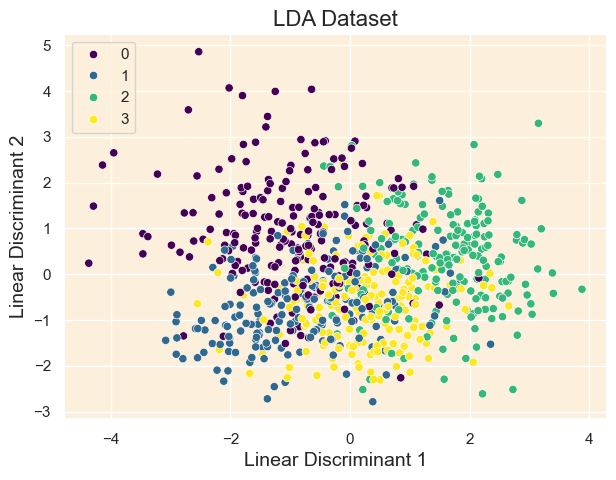

In [11]:
lda = LinearDiscriminantAnalysis(n_components = 2)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

print("Explained Variance Ratio:", lda.explained_variance_ratio_)
print("Class-wise Means:", lda.means_)
print("Class Priors:", lda.priors_)

lda_df = pd.DataFrame(data=X_train_lda, columns=['LD1', 'LD2'])
lda_df['target'] = y_train

plt.figure(figsize=(7, 5))
sns.scatterplot(x='LD1', y='LD2', hue='target', data=lda_df, palette='viridis')
plt.title('LDA Dataset', fontsize=16)
plt.xlabel('Linear Discriminant 1', fontsize=14)
plt.ylabel('Linear Discriminant 2', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [12]:
clf.fit(X_train_lda, y_train)
y_pred_lda = clf.predict(X_test_lda)

accuracy_after = accuracy_score(y_test, y_pred_lda)
report_after = classification_report(y_test, y_pred_lda)

print("\nClassification Report After PCA:\n", report_after)


Classification Report After PCA:
               precision    recall  f1-score   support

           0       0.60      0.63      0.62        46
           1       0.55      0.51      0.53        55
           2       0.73      0.73      0.73        44
           3       0.46      0.47      0.46        55

    accuracy                           0.57       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.58      0.57      0.57       200



# <b><span style='color:#ff6200'>   t-Distributed Stochastic Neighbor Embedding (t-SNE)</span>

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a powerful dimensionality reduction technique specifically designed for visualizing high-dimensional data. Unlike linear techniques such as PCA, t-SNE is a non-linear method that is well-suited for capturing complex relationships in data. It works by converting the high-dimensional Euclidean distances between data points into conditional probabilities that represent similarities. Then, it tries to find a low-dimensional representation of the data that preserves these similarities as closely as possible.

### t-SNE operates in two main steps:

- High-Dimensional Space: It calculates pairwise similarities between data points in the high-dimensional space using Gaussian distributions. This results in a probability distribution that reflects the likelihood of one point being a neighbor of another.
- Low-Dimensional Space: It maps the data points to a lower-dimensional space, typically 2D or 3D, and adjusts the positions to minimize the difference between the probability distributions in the high-dimensional and low-dimensional spaces. The result is a visualization where similar points are placed close together, and dissimilar points are placed farther apart.

t-SNE is particularly useful for exploratory data analysis and visualization, allowing for the identification of clusters or patterns that might not be apparent in higher-dimensional spaces.

In [13]:
X, y = make_classification(n_samples=1000, n_features=50, n_informative=30, n_redundant=10, random_state=42)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state = 42)

clf.fit(X_train, y_train)
y_pred_t_SNE = clf.predict(X_test)

accuracy_after = accuracy_score(y_test, y_pred_t_SNE)
report_after = classification_report(y_test, y_pred_t_SNE)

print("\nClassification Report After PCA:\n", report_after)


Classification Report After PCA:
               precision    recall  f1-score   support

           0       0.49      0.53      0.51        95
           1       0.54      0.50      0.51       105

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200



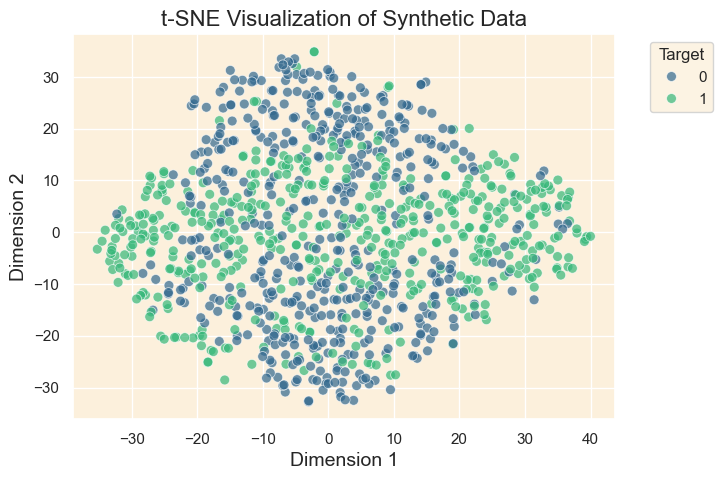

In [14]:
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Target'] = y

plt.figure(figsize=(7, 5))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Target', data=tsne_df, palette='viridis', alpha=0.7, s=50)
plt.title('t-SNE Visualization of Synthetic Data', fontsize=16)
plt.xlabel('Dimension 1', fontsize=14)
plt.ylabel('Dimension 2', fontsize=14)
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()